روی داده های برق داده شده تمام کارهای مورد نیار را انجام داده و در انتها داده با فیچر های زیر را نیز پیش بینی کنید

"CO2Intensity"=491.32, "SystemLoadEA"=4241.05, "Day"=10, "ForecastWindProduction"=54.10, , "SMPEA"=49.56, "ORKTemperature"=9.0, "ORKWindspeed"=14.8, "ActualWindProduction"=54.0, "Month"=12, "SystemLoadEP2"=4426.84]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [171]:
df=pd.read_csv('electricity.csv')
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


#### فیچر های خواسته شده در صورت سوال را نگه داشته چون پیش بینی مدل باید بر اساس آن ها صورت گیرد و بقیه حذف میشوند

In [172]:
df=df.filter(['CO2Intensity','SystemLoadEA','Day','ForecastWindProduction','SMPEA','ORKTemperature','ORKWindspeed','ActualWindProduction','Month','SystemLoadEP2','SMPEP2'],axis=1)

In [173]:
df

,CO2Intensity,SystemLoadEA,Day,ForecastWindProduction,SMPEA,ORKTemperature,ORKWindspeed,ActualWindProduction,Month,SystemLoadEP2,SMPEP2
0,600.71,3388.77,1,315.31,49.26,6.00,9.30,356.00,11,3159.60,54.32
1,605.42,3196.66,1,321.80,49.26,6.00,11.10,317.00,11,2973.01,54.23
2,589.97,3060.71,1,328.57,49.10,5.00,11.10,311.00,11,2834.00,54.23
3,585.94,2945.56,1,335.60,48.04,6.00,9.30,313.00,11,2725.99,53.47
4,571.52,2849.34,1,342.90,33.75,6.00,11.10,346.00,11,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...
38009,285.31,3932.22,31,1179.14,34.51,6.00,22.20,812.0,12,3692.95,42.45
38010,278.31,3821.44,31,1152.01,33.83,5.00,24.10,852.0,12,3571.0,33.83
38011,280.91,3724.21,31,1123.67,31.75,4.00,20.40,962.0,12,3460.29,31.75
38012,302.46,3638.16,31,1094.24,33.83,5.00,14.80,950.0,12,3563.99,50.6


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CO2Intensity            38014 non-null  object
 1   SystemLoadEA            38014 non-null  object
 2   Day                     38014 non-null  int64 
 3   ForecastWindProduction  38014 non-null  object
 4   SMPEA                   38014 non-null  object
 5   ORKTemperature          38014 non-null  object
 6   ORKWindspeed            38014 non-null  object
 7   ActualWindProduction    38014 non-null  object
 8   Month                   38014 non-null  int64 
 9   SystemLoadEP2           38014 non-null  object
 10  SMPEP2                  38014 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.2+ MB


In [175]:
df.isnull().sum()

CO2Intensity              0
SystemLoadEA              0
Day                       0
ForecastWindProduction    0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
ActualWindProduction      0
Month                     0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

## Change Objective to Float

In [176]:
df['SMPEP2'] = df['SMPEP2'].str.replace('?', 'nan')

df['CO2Intensity'] = df['CO2Intensity'].str.replace('?', 'nan')

df['SystemLoadEA'] = df['SystemLoadEA'].str.replace('?', 'nan')

df['ForecastWindProduction'] = df['ForecastWindProduction'].str.replace('?', 'nan')

df['SMPEA'] = df['SMPEA'].str.replace('?', 'nan')

df['ORKTemperature'] = df['ORKTemperature'].str.replace('?', 'nan')

df['ORKWindspeed'] = df['ORKWindspeed'].str.replace('?', 'nan')

df['ActualWindProduction'] = df['ActualWindProduction'].str.replace('?', 'nan')

df['SystemLoadEP2'] = df['SystemLoadEP2'].str.replace('?', 'nan')

df.shape

(38014, 11)

In [178]:
df['CO2Intensity']=df.CO2Intensity.astype('float')
df['SystemLoadEA']=df.SystemLoadEA.astype('float')
df['ForecastWindProduction']=df.ForecastWindProduction.astype('float')
df['ORKTemperature']=df.ORKTemperature.astype('float')
df['ORKWindspeed']=df.ORKWindspeed.astype('float')
df['ActualWindProduction']=df.ActualWindProduction.astype('float')
df['SystemLoadEP2']=df.SystemLoadEP2.astype('float')
df['SMPEA']=df.SMPEA.astype('float')

df['SMPEP2']=df.SMPEP2.astype('float')


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO2Intensity            32761 non-null  float64
 1   SystemLoadEA            32766 non-null  float64
 2   Day                     38014 non-null  float64
 3   ForecastWindProduction  32763 non-null  float64
 4   SMPEA                   32766 non-null  float64
 5   ORKTemperature          37719 non-null  float64
 6   ORKWindspeed            37715 non-null  float64
 7   ActualWindProduction    32763 non-null  float64
 8   Month                   38014 non-null  float64
 9   SystemLoadEP2           32766 non-null  float64
 10  SMPEP2                  32766 non-null  float64
dtypes: float64(11)
memory usage: 3.2 MB


In [180]:
df=df.dropna()

In [181]:
df.isnull().sum()

CO2Intensity              0
SystemLoadEA              0
Day                       0
ForecastWindProduction    0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
ActualWindProduction      0
Month                     0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

## Check outliers

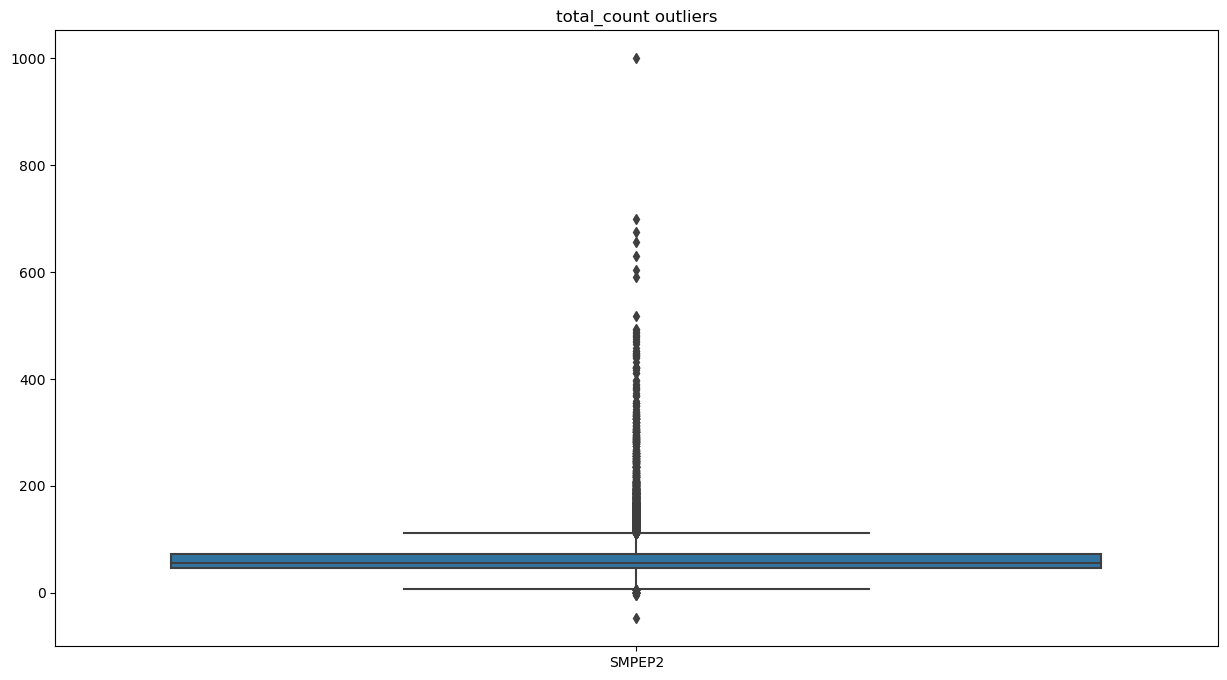

In [182]:
## The target is SMEP2
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['SMPEP2']])
ax.set_title('total_count outliers')
plt.show()

In [183]:
cols = ['SMPEP2']
Q1=df.quantile(0.15)
Q3=df.quantile(0.70)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()
df.describe()

,index,CO2Intensity,SystemLoadEA,Day,ForecastWindProduction,SMPEA,ORKTemperature,ORKWindspeed,ActualWindProduction,Month,SystemLoadEP2,SMPEP2
count,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000,30358.000000
mean,16430.615192,489.435598,3942.419959,15.478424,521.413263,58.895929,9.774557,19.232924,500.236511,6.309935,3708.449044,57.642046
std,9480.888313,84.983431,825.780545,8.807796,402.967454,22.961098,4.489284,9.461471,367.511854,3.414579,803.768527,17.450767
min,0.000000,0.000000,2183.940000,1.000000,0.900000,0.000000,-4.000000,0.000000,1.000000,1.000000,1809.960000,5.030000
25%,8307.250000,433.242500,3240.135000,8.000000,175.825000,44.910000,7.000000,13.000000,187.000000,3.000000,3013.650000,45.110000
50%,16207.500000,492.185000,4000.830000,15.000000,417.670000,53.810000,10.000000,18.500000,423.000000,6.000000,3773.135000,53.870000
75%,24835.750000,547.240000,4559.682500,23.000000,807.072500,67.640000,13.000000,24.100000,764.000000,9.000000,4351.375000,67.950000
max,32767.000000,842.880000,6414.100000,31.000000,1673.800000,474.390000,25.000000,72.200000,1505.000000,12.000000,6049.550000,107.230000


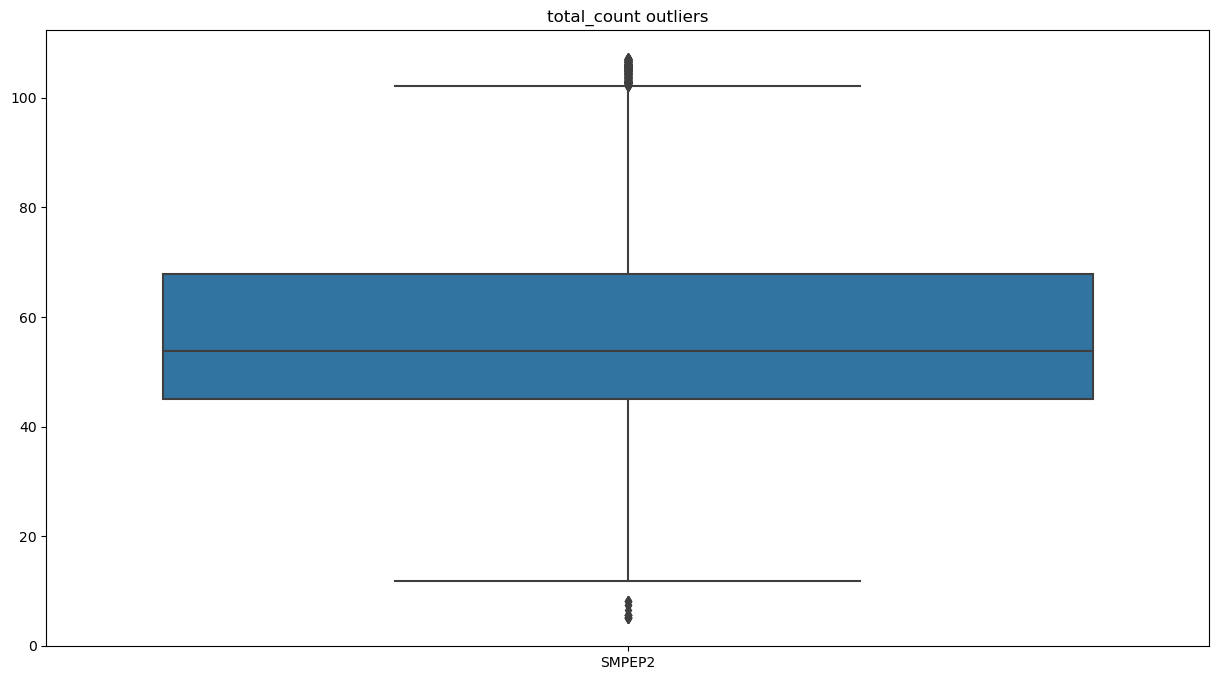

In [184]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[['SMPEP2']])
ax.set_title('total_count outliers')
plt.show()

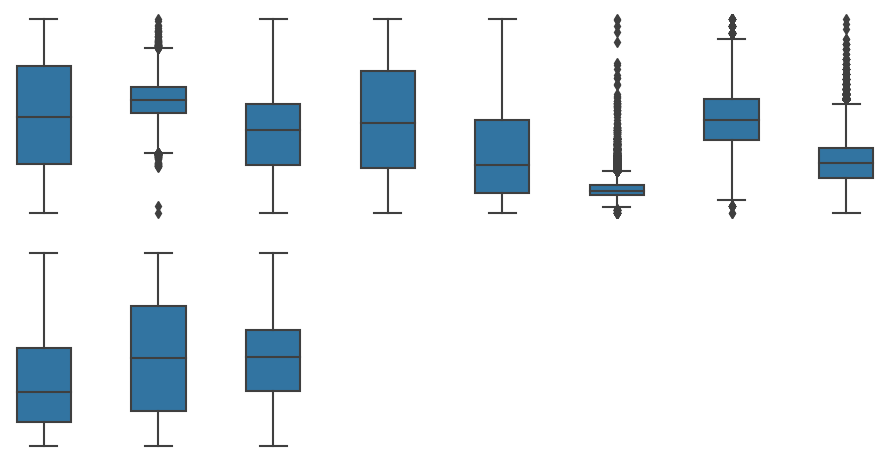

In [185]:
column=df.columns.drop(['SMPEP2'])

plt.figure(figsize=(9,5 ))
no=0
for col in column:
    no+=1
    plt.subplot(2,8,no)
    plt.tight_layout()
    plt.axis('off')
    sns.boxplot(y=df[col])  
    


In [186]:
cols = ['ORKTemperature','SMPEA','CO2Intensity','ORKWindspeed',]
Q1=df.quantile(0.25)
Q3=df.quantile(0.80)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()
df.describe()

,level_0,index,CO2Intensity,SystemLoadEA,Day,ForecastWindProduction,SMPEA,ORKTemperature,ORKWindspeed,ActualWindProduction,Month,SystemLoadEP2,SMPEP2
count,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.00000
mean,15190.656269,16443.514775,491.046444,3914.336329,15.489534,513.211483,56.708988,9.785656,18.897469,492.916855,6.311581,3684.319108,57.13580
std,8772.317176,9489.807326,84.250983,814.607164,8.808921,395.928772,16.754992,4.498497,8.973360,361.603404,3.400170,794.792727,17.07776
min,0.000000,0.000000,242.090000,2183.940000,1.000000,0.900000,6.020000,-3.000000,0.000000,2.000000,1.000000,1809.960000,5.03000
25%,7595.250000,8313.250000,435.122500,3219.252500,8.000000,174.277500,44.720000,7.000000,13.000000,185.000000,3.000000,2995.832500,44.98000
50%,15100.500000,16125.500000,493.490000,3966.455000,15.000000,410.200000,53.240000,10.000000,18.500000,417.000000,6.000000,3746.195000,53.55000
75%,22828.750000,24925.750000,548.780000,4536.415000,23.000000,793.900000,66.330000,13.000000,24.100000,753.000000,9.000000,4330.592500,67.09750
max,30357.000000,32767.000000,751.190000,6333.520000,31.000000,1654.800000,111.350000,24.000000,44.400000,1505.000000,12.000000,6014.110000,107.23000


In [187]:
df=df.drop(['level_0','index'],axis=1)

## Visualize of data

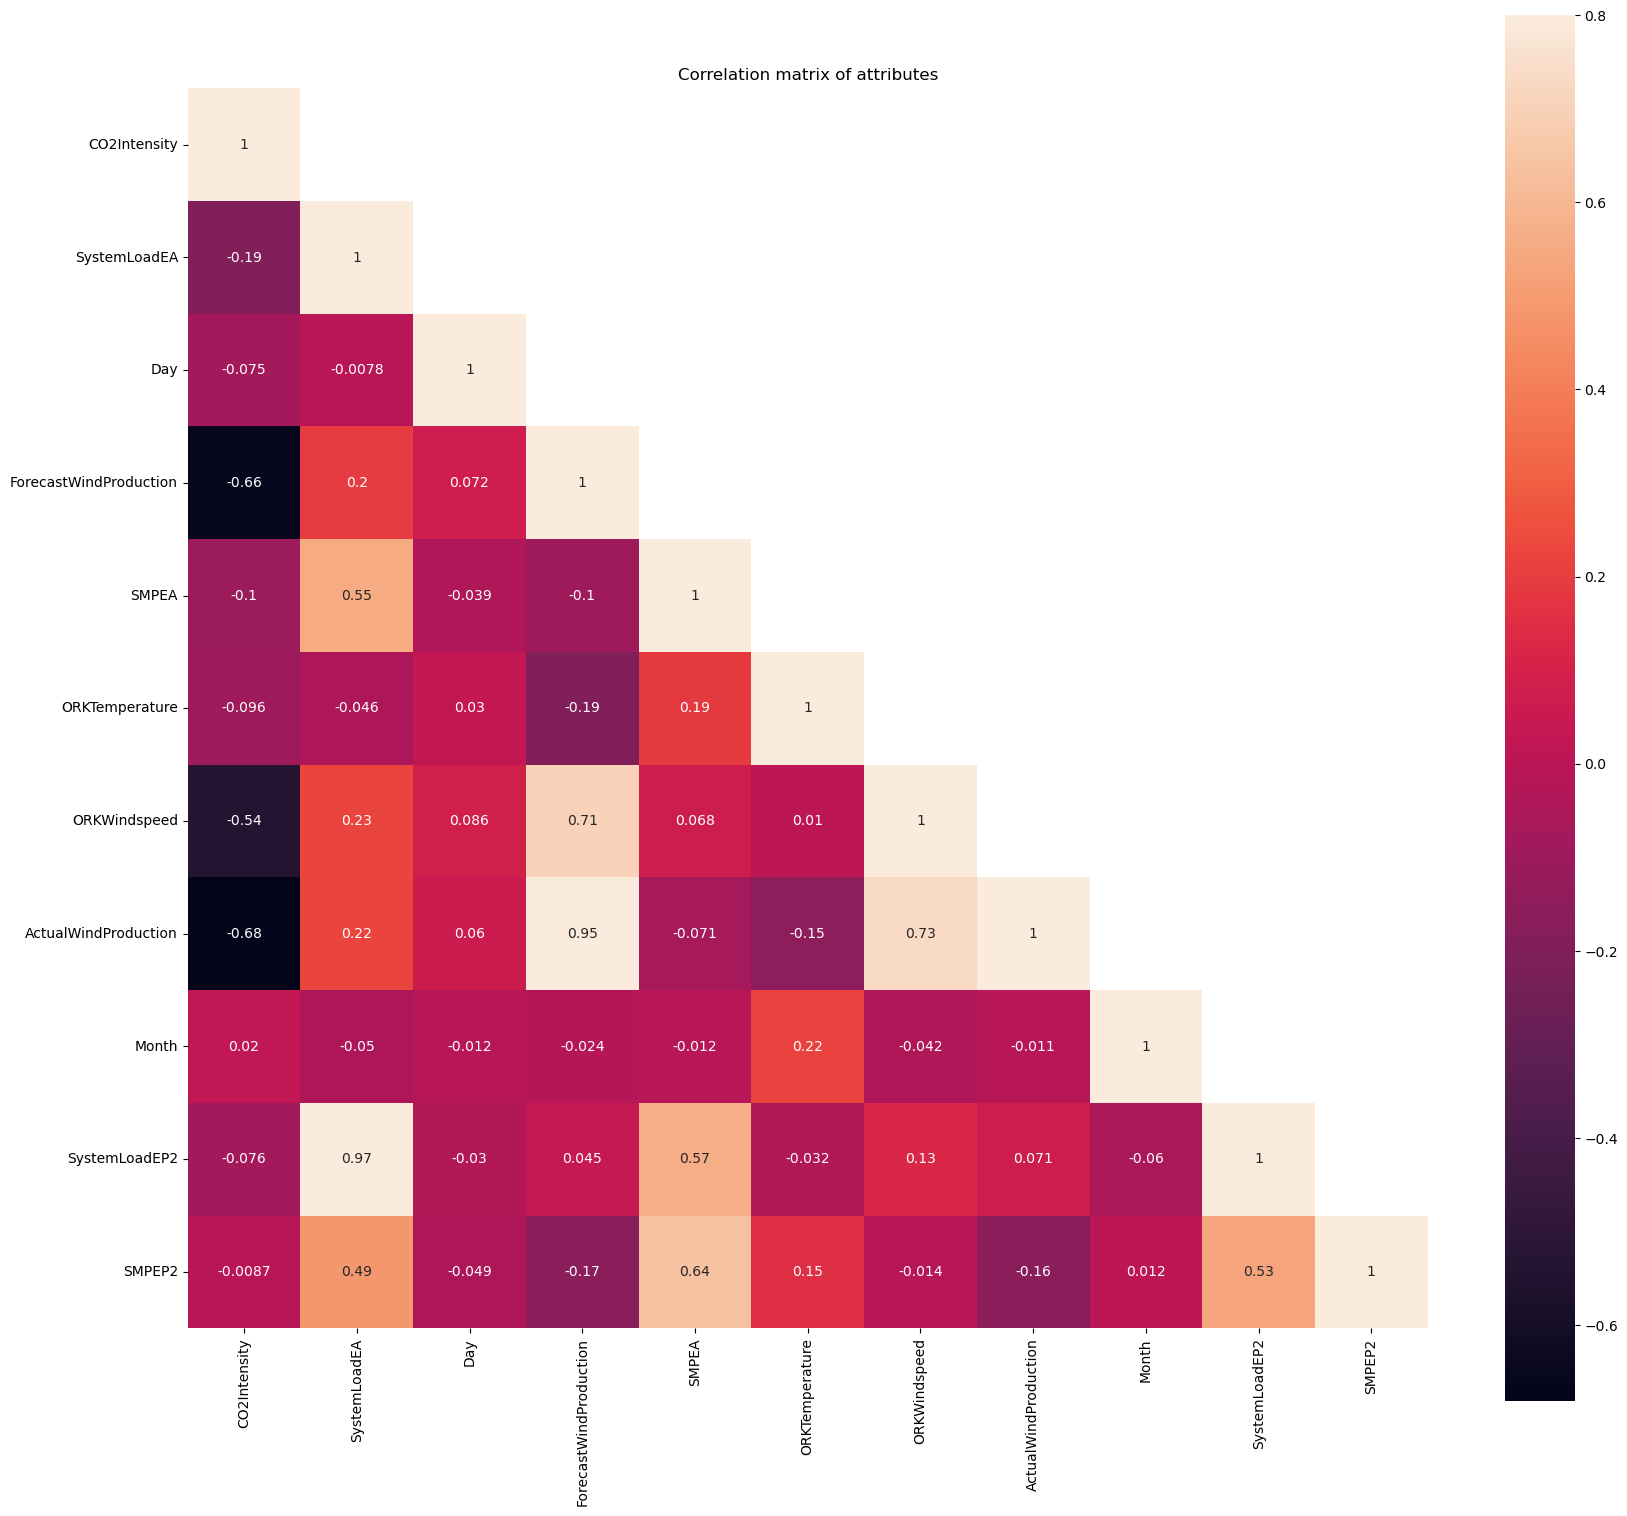

In [188]:
correMtr=df.corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(20,18))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

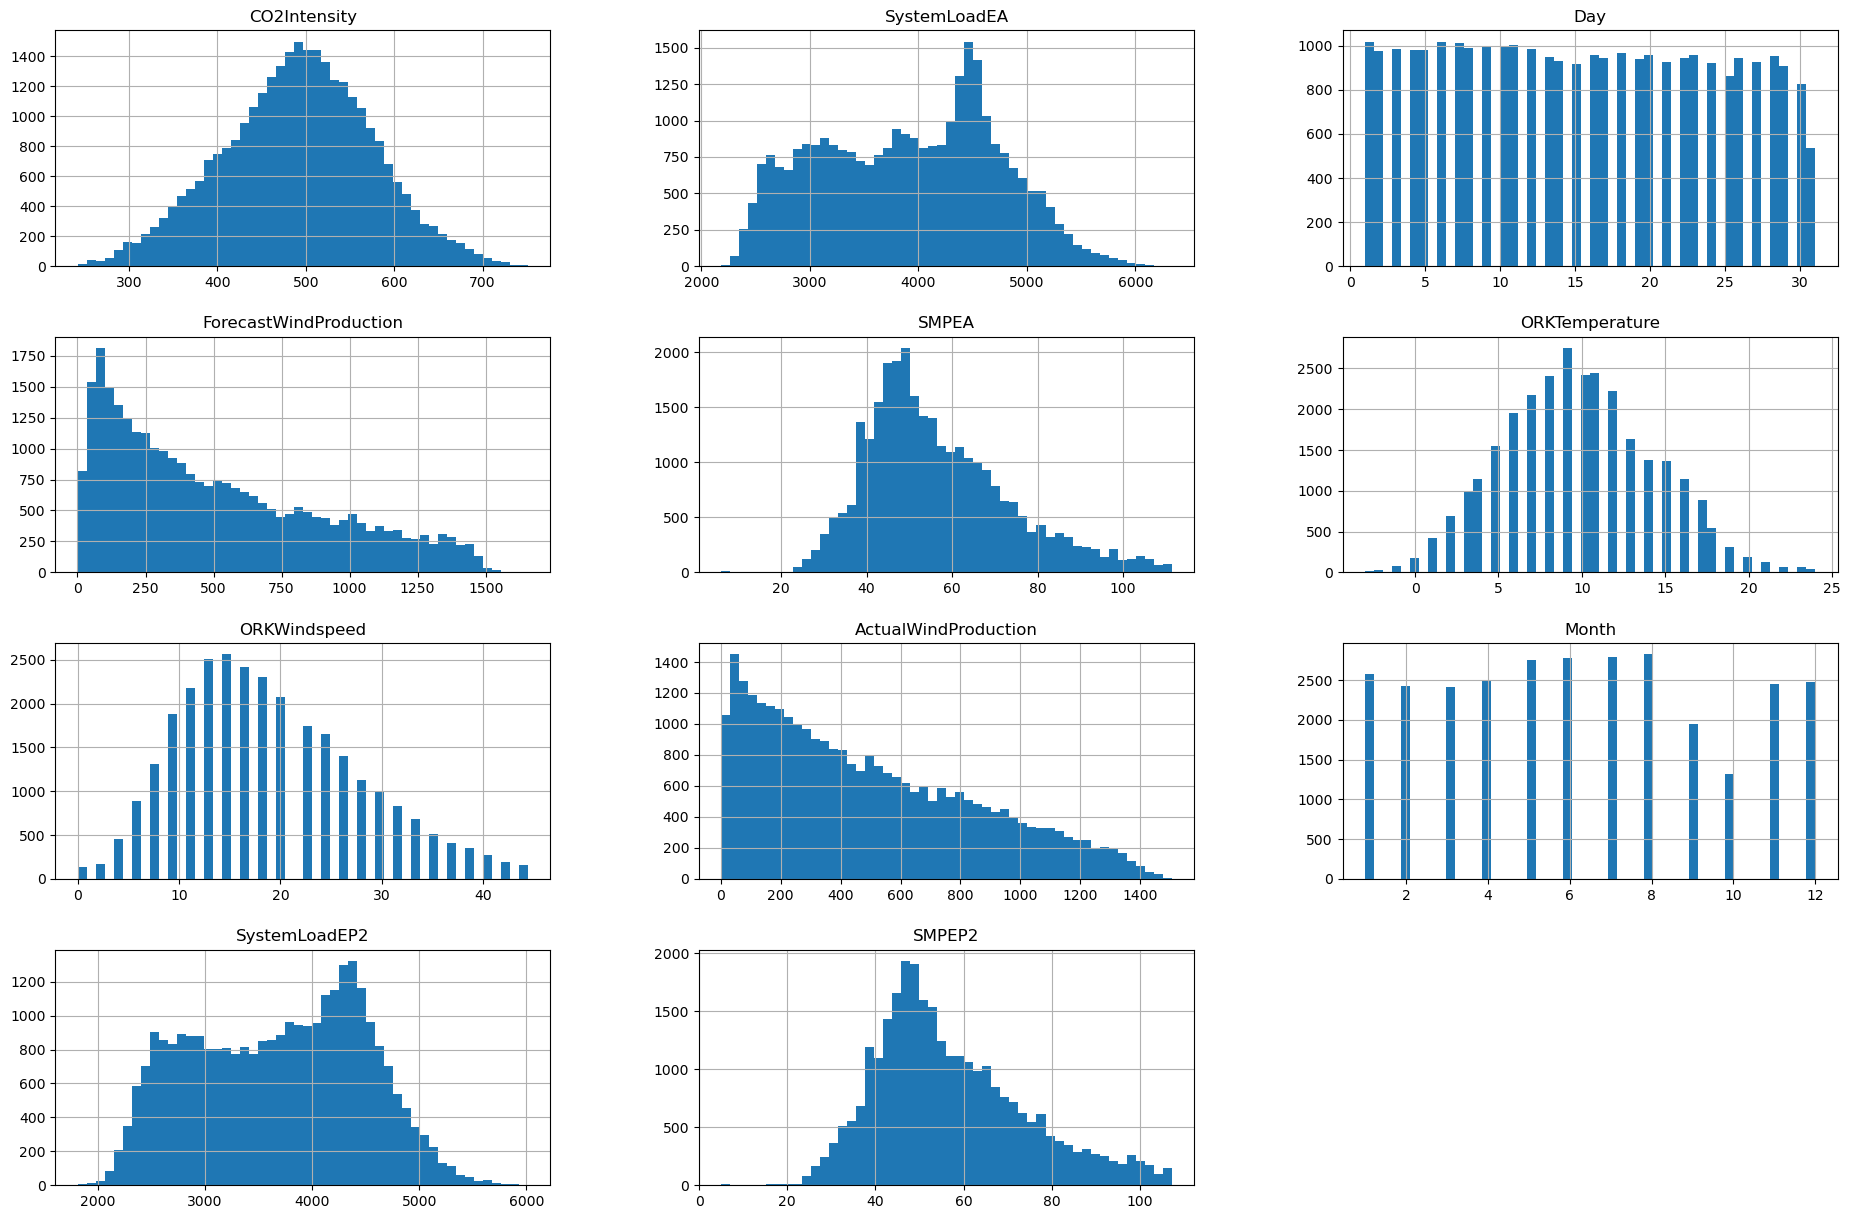

In [189]:
df.hist(bins=50, figsize=(23,15))
plt.show()

<Figure size 800x500 with 0 Axes>

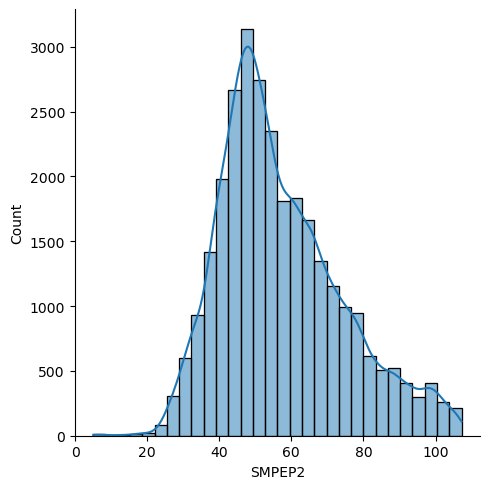

In [190]:
plt.figure(figsize=(8,5))
sns.displot(df['SMPEP2'] , bins=30 , kde=True )

## Regression

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error


In [192]:
X = df.drop(['SMPEP2'],axis=1).values
y = df['SMPEP2'].values

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [224]:
def Model(model):
    
    print("MSE : ", metrics.mean_squared_error(y_test, y_predict))
    print("R2_SCORE : ", metrics.r2_score(y_test, y_predict))
    print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))

## KNN

In [195]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [226]:
params = {
    'n_neighbors': [1,3,5,9],  
    'weights': ['distance'],  
    }


In [227]:
knn = KNeighborsRegressor()
rs = GridSearchCV(estimator=knn, param_grid=params, cv=10, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)
knn = rs.best_estimator_




KNeighborsRegressor(n_neighbors=9, weights='distance')


In [228]:
knn_= make_pipeline(preprocessing.StandardScaler(),KNeighborsRegressor(n_neighbors=9,weights='distance'))
knn_.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=9, weights='distance'))])

In [229]:
y_predict = knn_.predict(X_test) 

In [230]:
Model(knn_)

MSE :  65.01878060665003
R2_SCORE :  0.7741456714342616
MAPE :  0.09264853441481642


## پیش بینی مقدار های خواسته شده در صورت سوال 

In [202]:
knn_.predict([[491.32,4241,10,54.10,49.56,9,14.8,54,12,4426.84]]) 

array([62.95475899])

## RandomForestRegressor

In [214]:
from sklearn.ensemble import RandomForestRegressor

In [231]:
randomـ= make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor())
randomـ.fit(X_train, y_train)
y_predict= randomـ.predict(X_test)

In [232]:
Model(randomـ)

MSE :  60.29179445064979
R2_SCORE :  0.7905657007618153
MAPE :  0.09129649838096938


In [233]:
randomـ.predict([[491.32,4241,10,54.10,49.56,9,14.8,54,12,4426.84]]) 

array([65.3106])

In [234]:
rf_pipeline = Pipeline([('StandardScaler()', StandardScaler()),
                       ("RF", RandomForestRegressor())])

grid = {
    # 'RF__n_estimators' : [100,200,300],
    'RF__max_depth' : [1,5,10]

}
grid_search_cv = GridSearchCV(rf_pipeline, grid,  n_jobs = -1)

In [235]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('StandardScaler()', StandardScaler()),
                                       ('RF', RandomForestRegressor())]),
             n_jobs=-1, param_grid={'RF__max_depth': [1, 5, 10]})

In [236]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_cv.best_score_))


print('Parameters that give the best results :','\n\n', (grid_search_cv.best_params_))

GridSearch CV best score : 0.6328


Parameters that give the best results : 

 {'RF__max_depth': 10}


In [237]:
random= make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=10))
random.fit(X_train, y_train)
y_predict= random.predict(X_test)

In [238]:
Model(random)

MSE :  100.77565737474082
R2_SCORE :  0.6499377838252618
MAPE :  0.13060943417526372


In [239]:
random.predict([[491.32,4241,10,54.10,49.56,9,14.8,54,12,4426.84]]) 

array([63.30821912])

## Gradeint Boosting

In [218]:
from sklearn.ensemble import GradientBoostingRegressor

In [245]:
gradient= make_pipeline(preprocessing.StandardScaler(),GradientBoostingRegressor(loss='absolute_error', learning_rate=1))
gradient.fit(X_train, y_train)
y_predict= gradient.predict(X_test)

In [246]:
Model(gradient)

MSE :  127.45523370792142
R2_SCORE :  0.5572615179382856
MAPE :  0.1366374047454763


In [247]:
gradient.predict([[491.32,4241,10,54.10,49.56,9,14.8,54,12,4426.84]]) 

array([57.2])

به صورت واترمارک کنید و خروجی را ذخیره کنید logo.pngروی عکس یکی از دوستان یا خانواده